In [3]:
def max_upward_streak(prices):
    if len(prices) < 2:
        return 0

    current_streak = 0
    max_streak = 0

    for i in range(1, len(prices)):
        if prices[i] > prices[i - 1]:
            current_streak += 1
            if current_streak > max_streak:
                max_streak = current_streak
        else:
            current_streak = 0

    return max_streak

prices = [
    42000, 42100, 42350, 42500,
    42400,
    42600, 42800,
    42700,
    42900, 43000, 43100, 43200,
    43150
]

print(max_upward_streak(prices))



4


In [9]:
import numpy as np


np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)


mean = np.mean(data)
median = np.median(data)
std = np.std(data)


lower = mean - 2 * std
upper = mean + 2 * std


outside_count = np.sum((data < lower) | (data > upper))
outside_percentage = (outside_count / len(data)) * 100


print("Mean:", mean)
print("Median:", median)
print("Std:", std)
print("Outside ±2std (%):", outside_percentage)


Mean: 49.59229034827915
Median: 49.958081159522635
Std: 9.286734887354715
Outside ±2std (%): 6.0


In [8]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 300
customer_age = np.random.randint(18, 65, size=n)

monthly_income = np.random.normal(loc=6000, scale=2000, size=n)
monthly_income = np.clip(monthly_income, 1500, 15000)

visits_per_month = np.random.poisson(lam=5, size=n)
visits_per_month = np.clip(visits_per_month, 0, 20)


purchase_score = (
    0.0004 * monthly_income +
    0.4 * visits_per_month -
    0.02 * customer_age +
    np.random.normal(0, 1, size=n)
)

purchased = (purchase_score > 3).astype(int)


df = pd.DataFrame({
    "customer_age": customer_age,
    "monthly_income": monthly_income,
    "visits_per_month": visits_per_month,
    "purchased": purchased
})

print(df.head())
print("\nPurchase rate:", df["purchased"].mean())
import numpy as np
import pandas as pd

np.random.seed(42)
n = 300
customer_age = np.random.randint(18, 65, size=n)

monthly_income = np.random.normal(loc=80000, scale=20000, size=n)
monthly_income = np.clip(monthly_income, 20000, 150000)

visits_per_month = np.random.poisson(lam=5, size=n)
visits_per_month = np.clip(visits_per_month, 1, 20)


purchased = np.where(
    (visits_per_month > 5) & (monthly_income > 70000),
    1,
    0
)


df = pd.DataFrame({
    "customer_age": customer_age,
    "monthly_income": monthly_income,
    "visits_per_month": visits_per_month,
    "purchased": purchased
})


df["income_per_visit"] = df["monthly_income"] / df["visits_per_month"]


grouped_means = df.groupby("purchased").mean()

print(grouped_means)



   customer_age  monthly_income  visits_per_month  purchased
0            56     5990.286111                 2          0
1            46     5233.353387                 5          1
2            32     5074.946280                 4          0
3            60     3775.005291                 2          0
4            25     7734.458998                 6          1

Purchase rate: 0.65
           customer_age  monthly_income  visits_per_month  income_per_visit
purchased                                                                  
0             40.730088    76190.273710          4.172566      24542.248943
1             41.054054    89597.636648          7.432432      12433.787802


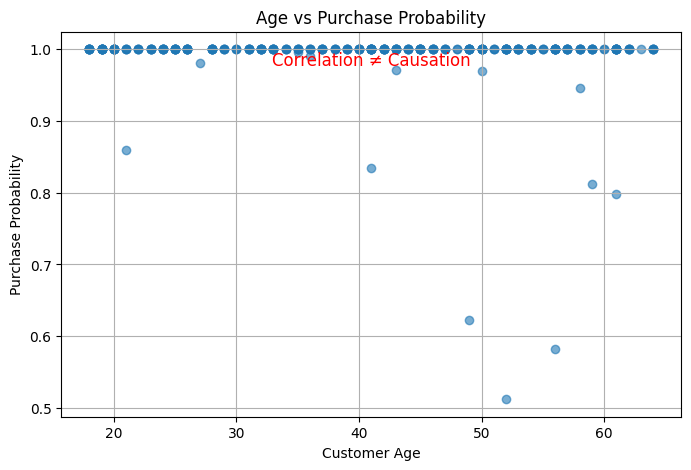

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 300


age = np.random.randint(18, 65, size=n)
income = np.random.normal(80000, 20000, size=n)
visits = np.random.poisson(5, size=n)

purchase_prob = (
    0.00002 * income +
    0.08 * visits -
    0.005 * age +
    np.random.normal(0, 0.15, size=n)
)


purchase_prob = np.clip(purchase_prob, 0, 1)
plt.figure(figsize=(8, 5))
plt.scatter(age, purchase_prob, alpha=0.6)
plt.xlabel("Customer Age")
plt.ylabel("Purchase Probability")
plt.title("Age vs Purchase Probability")


plt.text(
    0.5, 0.95,
    "Correlation ≠ Causation",
    transform=plt.gca().transAxes,
    ha="center",
    va="top",
    fontsize=12,
    color="red"
)

plt.grid(True)
plt.show()


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

np.random.seed(42)


n = 1000
age = np.random.randint(18, 66, size=n)
income = np.random.randint(30000, 150001, size=n)

X = np.column_stack([age, income])

age_c, income_c = 40, 90000
dist = ((age - age_c) / 12)**2 + ((income - income_c) / 25000)**2
y = ((dist > 0.7) & (dist < 2.0)).astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

model.fit(X_train, y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy:", acc)


new_customer = np.array([[28, 95000]])
print("New input prediction (0/1):", int(model.predict(new_customer)[0]))


Accuracy: 0.7933333333333333
New input prediction (0/1): 0
